In [111]:
library(dplyr)
library(ggplot2)
library(ggrepel)

In [2]:
lennard_jones = 
  readr::read_csv("lennard_jones.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_integer(),
  smirnoff_name = col_character(),
  smirnoff_type = col_integer(),
  smirnoff_e = col_double(),
  smirnoff_s = col_double(),
  original_name = col_character(),
  original_type = col_character(),
  original_e = col_double(),
  original_s = col_double()
)


In [3]:
head(lennard_jones, 5)

X1,smirnoff_name,smirnoff_type,smirnoff_e,smirnoff_s,original_name,original_type,original_e,original_s
0,C1,1,0.1094,3.399670,C1,c3,0.1094,3.399670
1,H1,2,0.0157,2.293173,H1,h2,0.0157,2.293173
2,O1,3,0.1700,3.000012,O1,os,0.1700,3.000012
3,C2,4,0.1094,3.399670,C2,c3,0.1094,3.399670
4,H2,5,0.0157,2.471353,H2,h1,0.0157,2.471353


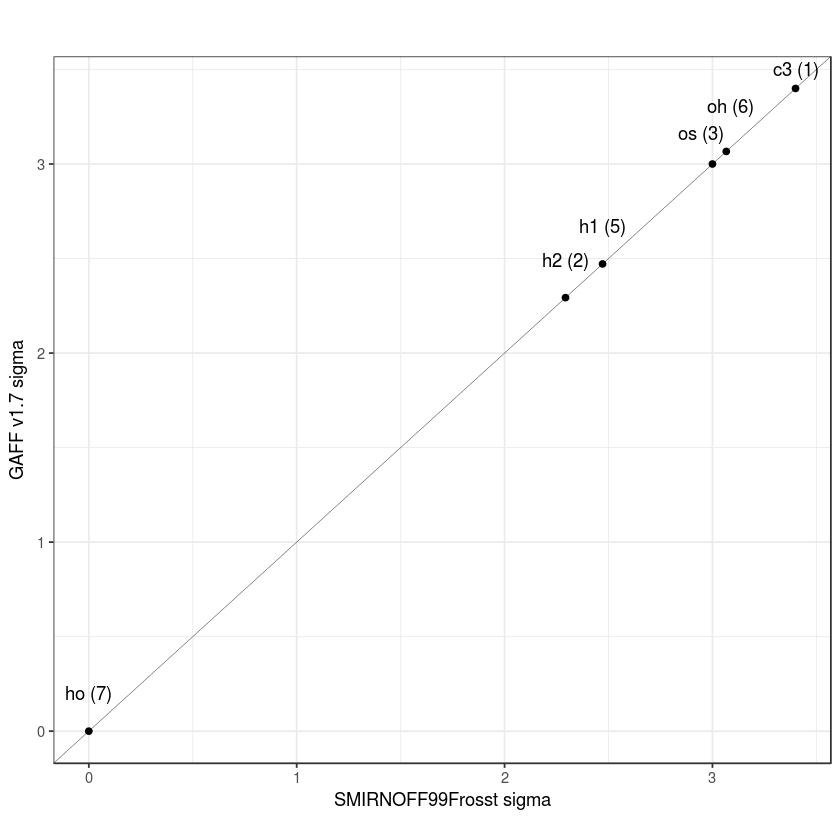

In [85]:
distinct(lennard_jones, smirnoff_s, .keep_all = TRUE) %>%
    ggplot(ggplot2::aes(x = smirnoff_s, y = original_s, label = paste0(original_type, " (", smirnoff_type, ")"))) + 
    geom_point() +
    geom_text_repel(nudge_y = 0.2, segment.size = 0) +
    geom_abline(slope = 1, size = 0.1) +
    labs(subtitle="", 
    y="GAFF v1.7 sigma", 
    x="SMIRNOFF99Frosst sigma", 
    title="", 
    caption = "") +
    theme_bw()


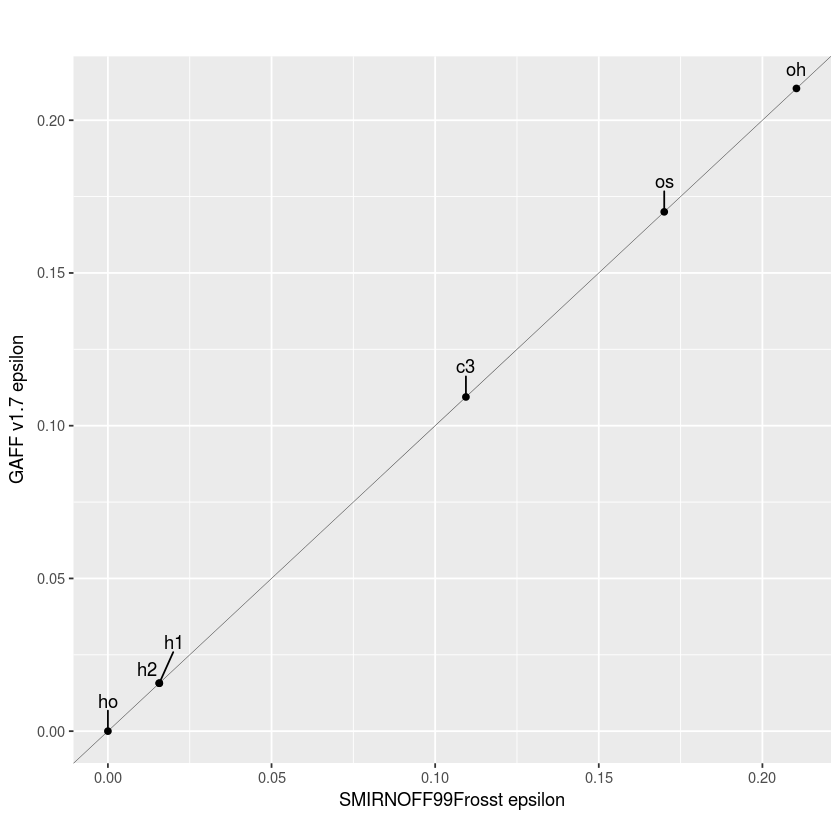

In [5]:
distinct(lennard_jones, smirnoff_e, .keep_all = TRUE) %>%
  ggplot(aes(x = smirnoff_e, y = original_e, label = original_type)) + 
  geom_point() +
  geom_text_repel(nudge_y = 0.01) +
  geom_abline(slope = 1, size = 0.1) +
  labs(subtitle="", 
       y="GAFF v1.7 epsilon", 
       # x=expression("SMIRNOFF99Frosst "~epsilon), 
       x = "SMIRNOFF99Frosst epsilon",
       title="", 
       caption = "")


In [8]:
bonds = 
  readr::read_csv("bonds.csv")


Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  X1 = col_integer(),
  atom1 = col_character(),
  atom2 = col_character(),
  atom1_type_o = col_character(),
  atom2_type_o = col_character(),
  req_o = col_double(),
  k_o = col_double(),
  atom1_type_s = col_integer(),
  atom2_type_s = col_integer(),
  req_s = col_double(),
  k_s = col_double()
)


In [10]:
bonds

X1,atom1,atom2,atom1_type_o,atom2_type_o,req_o,k_o,atom1_type_s,atom2_type_s,req_s,k_s
0,C1,O1,c3,os,1.439,301.5,1,3,1.370,320
2,C1,O1,c3,os,1.439,301.5,22,24,1.370,320
4,C1,O1,c3,os,1.439,301.5,43,45,1.370,320
6,C1,O1,c3,os,1.439,301.5,64,66,1.370,320
8,C1,O1,c3,os,1.439,301.5,85,87,1.370,320
10,C1,O1,c3,os,1.439,301.5,106,108,1.370,320
144,C1,C2,c3,c3,1.535,303.1,1,4,1.526,310
146,C1,C2,c3,c3,1.535,303.1,22,25,1.526,310
148,C1,C2,c3,c3,1.535,303.1,43,46,1.526,310
150,C1,C2,c3,c3,1.535,303.1,64,67,1.526,310


In [13]:
distinct(bonds, "atom1_type_o", "atom2_type_o", .keep_all = TRUE)

X1,atom1,atom2,atom1_type_o,atom2_type_o,req_o,k_o,atom1_type_s,atom2_type_s,req_s,k_s,"""atom1_type_o""","""atom2_type_o"""
0,C1,O1,c3,os,1.439,301.5,1,3,1.37,320,atom1_type_o,atom2_type_o


In [42]:
a <- bonds %>%
    distinct(req_s, .keep_all = TRUE)

b <- bonds %>%
    distinct(req_o, .keep_all = TRUE)

c <- right_join(a, b)

a
b
c

Joining, by = c("X1", "atom1", "atom2", "atom1_type_o", "atom2_type_o", "req_o", "k_o", "atom1_type_s", "atom2_type_s", "req_s", "k_s")


X1,atom1,atom2,atom1_type_o,atom2_type_o,req_o,k_o,atom1_type_s,atom2_type_s,req_s,k_s
0,C1,O1,c3,os,1.439,301.5,1,3,1.370,320
144,C1,C2,c3,c3,1.535,303.1,1,4,1.526,310
432,C1,H1,c3,h2,1.100,326.4,1,2,1.090,340
676,C2,O2,c3,oh,1.426,314.1,4,6,1.410,320
1108,O2,HO2,oh,ho,0.974,369.6,6,7,0.960,553


X1,atom1,atom2,atom1_type_o,atom2_type_o,req_o,k_o,atom1_type_s,atom2_type_s,req_s,k_s
0,C1,O1,c3,os,1.439,301.5,1,3,1.370,320
144,C1,C2,c3,c3,1.535,303.1,1,4,1.526,310
432,C1,H1,c3,h2,1.100,326.4,1,2,1.090,340
676,C2,O2,c3,oh,1.426,314.1,4,6,1.410,320
964,C2,H2,c3,h1,1.093,335.9,4,5,1.090,340
1108,O2,HO2,oh,ho,0.974,369.6,6,7,0.960,553


X1,atom1,atom2,atom1_type_o,atom2_type_o,req_o,k_o,atom1_type_s,atom2_type_s,req_s,k_s
0,C1,O1,c3,os,1.439,301.5,1,3,1.370,320
144,C1,C2,c3,c3,1.535,303.1,1,4,1.526,310
432,C1,H1,c3,h2,1.100,326.4,1,2,1.090,340
676,C2,O2,c3,oh,1.426,314.1,4,6,1.410,320
964,C2,H2,c3,h1,1.093,335.9,4,5,1.090,340
1108,O2,HO2,oh,ho,0.974,369.6,6,7,0.960,553


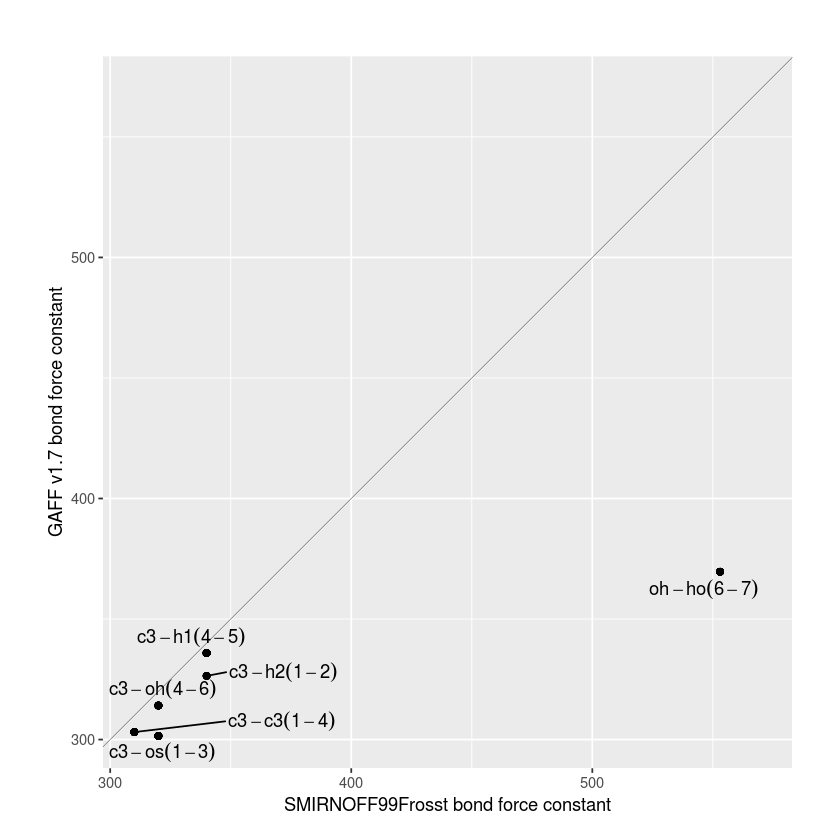

In [88]:
p <- distinct(bonds, .keep_all = TRUE) %>%
  ggplot(aes(x = k_s, y = k_o)) + 
  geom_point() +
  geom_abline(slope = 1, size = 0.1) +
  coord_equal() + 
  xlim(NA, 570) + 
  ylim(NA, 570) +
  labs(subtitle="", 
       y="GAFF v1.7 bond force constant", 
       x="SMIRNOFF99Frosst bond force constant", 
       title="", 
       caption = "")

q <- p +
  geom_point(data = c, aes(x = k_s, y = k_o)) +
  geom_text_repel(data = c, aes(x = k_s, y = k_o, label=paste0(atom1_type_o, "-", atom2_type_o, " (", 
                                                               atom1_type_s, "-", atom2_type_s, ")")),
                 parse = TRUE)
q

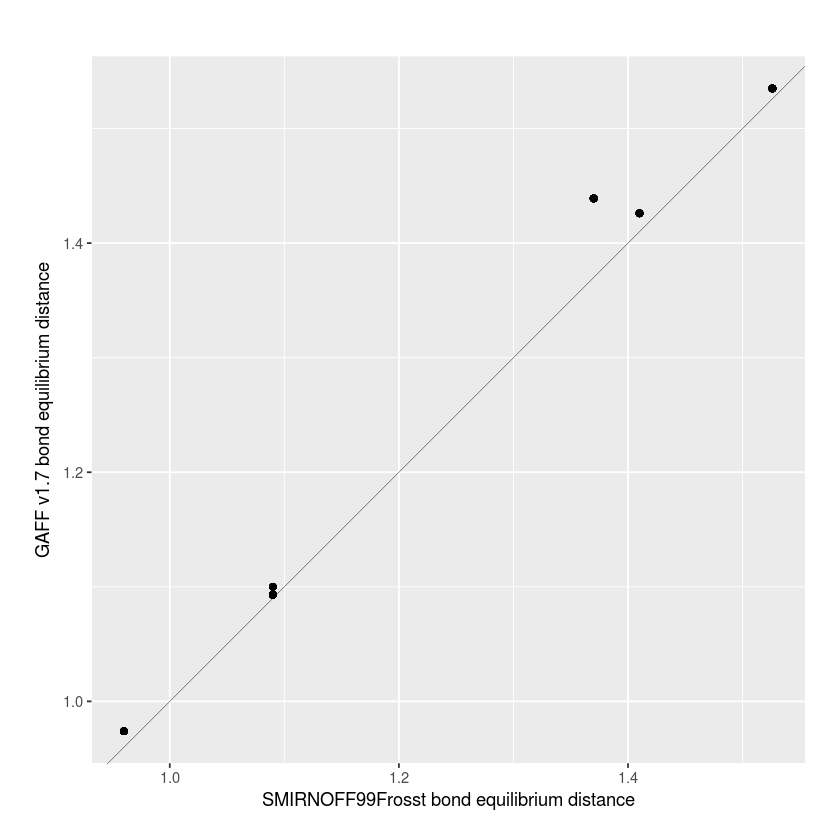

In [12]:
distinct(bonds, .keep_all = TRUE) %>%
  ggplot(aes(x = req_s, y = req_o, label = paste0(atom1, "-", atom2))) + 
  geom_point() +
  geom_abline(slope = 1, size = 0.1) +
  coord_equal() + 
  labs(subtitle="", 
       y="GAFF v1.7 bond equilibrium distance", 
       x="SMIRNOFF99Frosst bond equilibrium distance", 
       title="", 
       caption = "")


In [ ]:
distinct(bonds, atom1, atom2, .keep_all = TRUE) %>%
  ggplot(aes(x = req_s, y = req_o, label = paste0(atom1, "-", atom2))) + 
  geom_point(colour = "red") +
  geom_abline(slope = 1, size = 0.1) +
  coord_equal() + 
  geom_text_repel(
                 segment.size = 0.2) + 
  labs(subtitle="", 
       y="GAFF v1.7 bond equilibrium distance", 
       x="SMIRNOFF99Frosst bond equilibrium distance", 
       title="", 
       caption = "")


In [ ]:
bonds %>%
    filter(atom1 == "C2") %>%
    filter(atom2 == "C3")

In [ ]:
bonds

In [155]:
dihedrals = 
  readr::read_csv("dihedrals.csv")

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  .default = col_character(),
  X1 = col_integer(),
  phi_1_o = col_double(),
  phase_1_o = col_double(),
  phi_2_o = col_double(),
  phase_2_o = col_double(),
  phi_3_o = col_double(),
  phase_3_o = col_double(),
  atom1_type_s = col_integer(),
  atom2_type_s = col_integer(),
  atom3_type_s = col_integer(),
  atom4_type_s = col_integer(),
  phi_1_s = col_double(),
  phase_1_s = col_double(),
  phi_2_s = col_double(),
  phase_2_s = col_double(),
  phi_3_s = col_double(),
  phase_3_s = col_double()
)
See spec(...) for full column specifications.


Warning message:
“Removed 7 rows containing missing values (geom_point).”Warning message:
“Removed 7 rows containing missing values (geom_text_repel).”

Warning message:
“Removed 7 rows containing missing values (geom_point).”Warning message:
“Removed 7 rows containing missing values (geom_text_repel).”

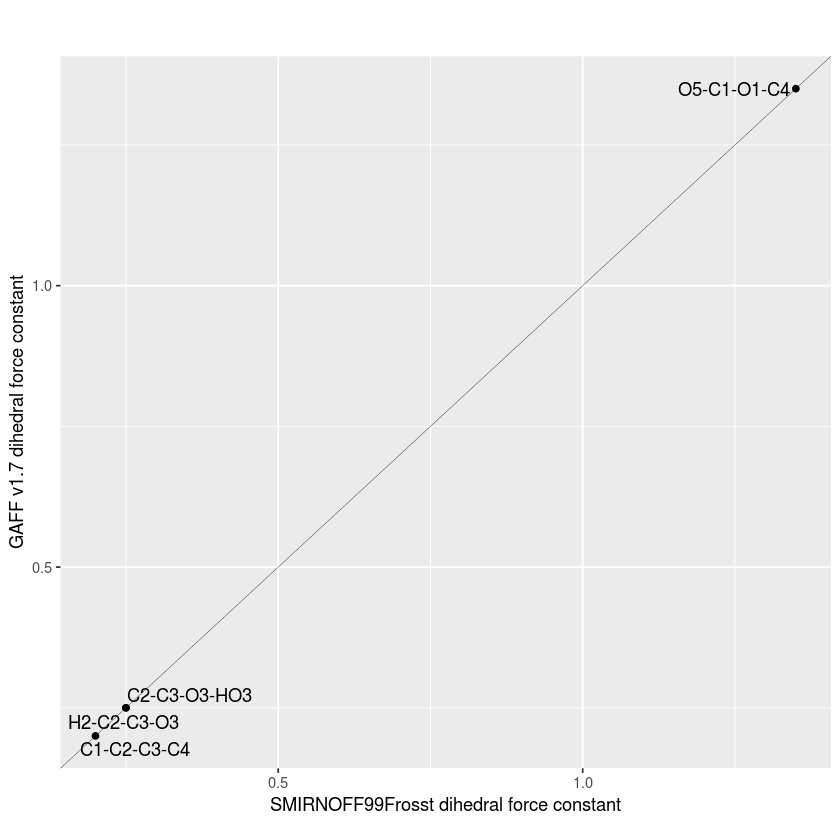

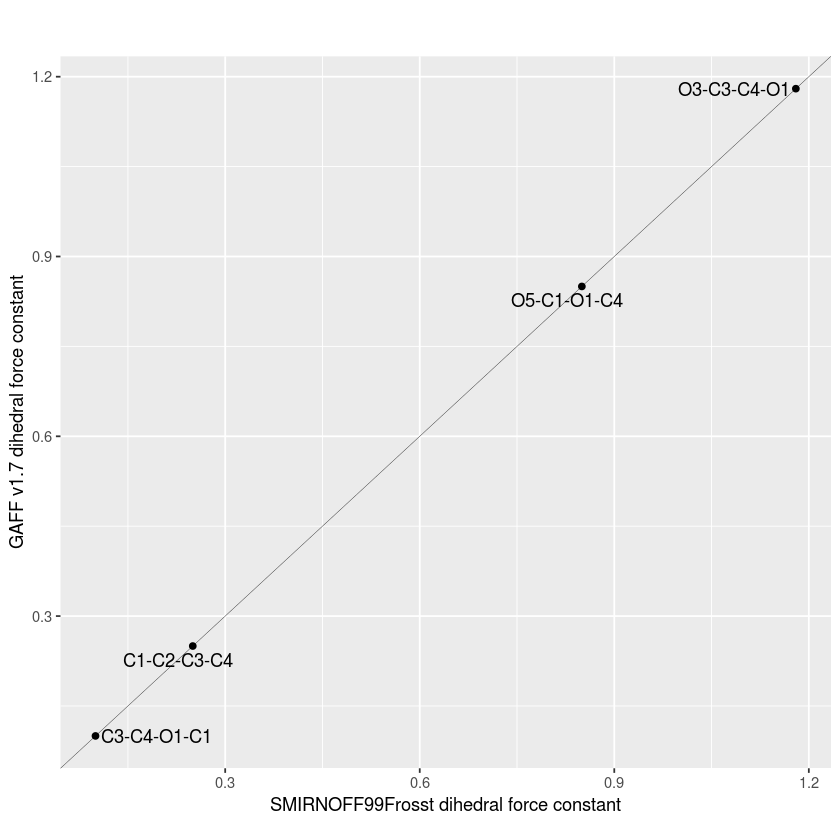

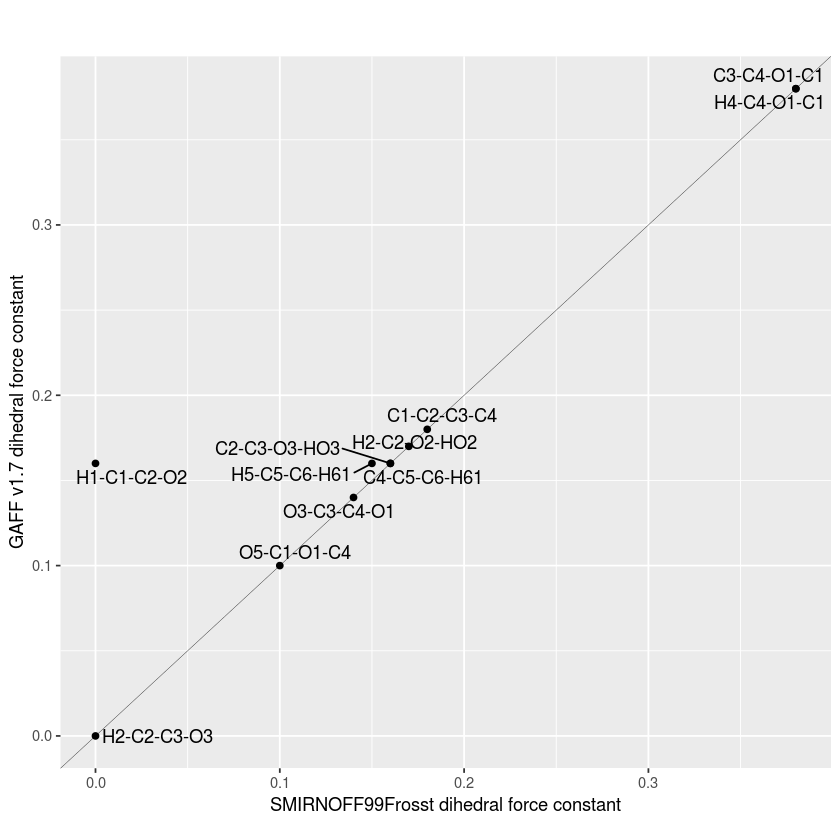

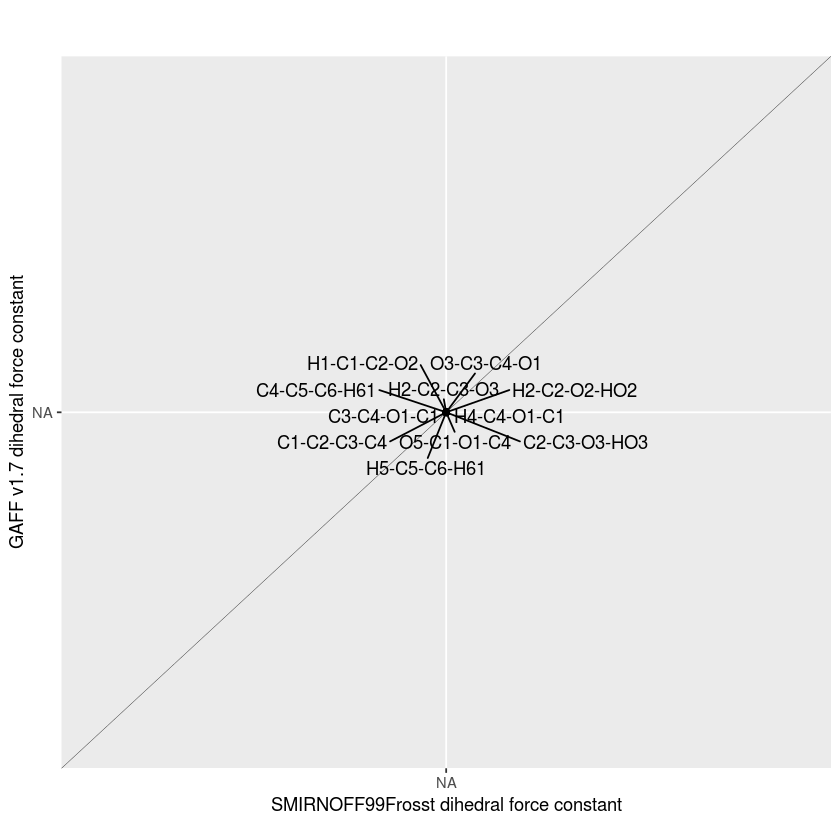

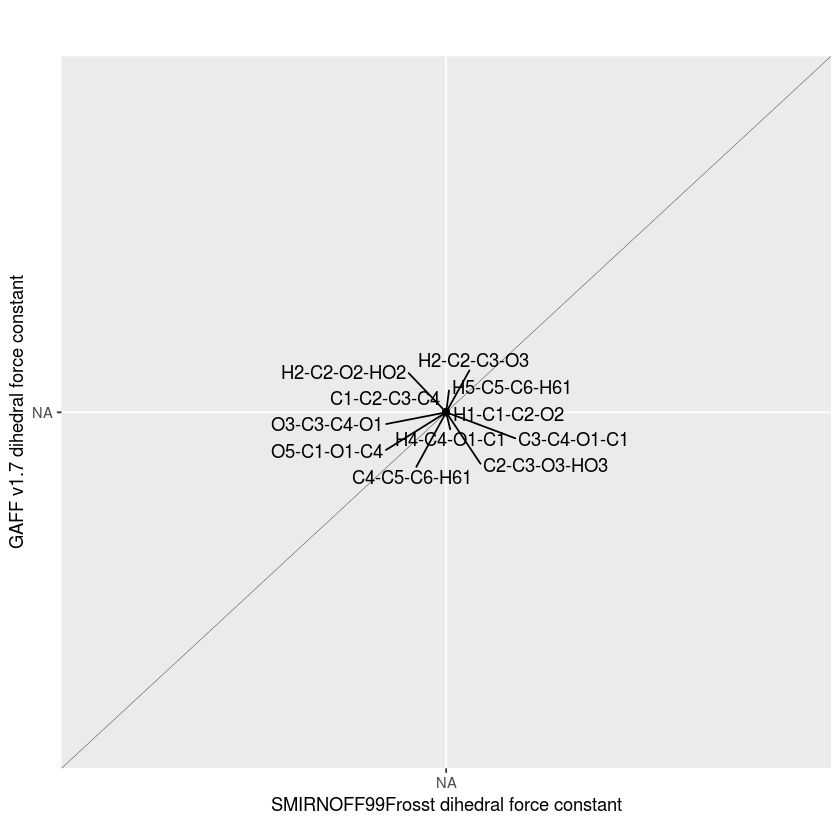

In [154]:
dihedrals %>%
  mutate_if(is.numeric, funs(round(., 2))) %>%
  distinct(phi_1_o, phase_1_o, phi_2_o, phase_2_o, phi_3_o, phase_3_o, phi_4_o, phase_4_o, phi_5_o, phase_5_o,
           phi_1_s, phase_1_s, phi_2_s, phase_2_s, phi_3_s, phase_3_s, phi_4_s, phase_4_s, phi_5_s, phase_5_s,
           .keep_all = TRUE) %>%
  ggplot(aes(x = phi_1_s, y = phi_1_o, label = paste0(atom1, "-", atom2, "-", atom3, "-", atom4))) + 
  geom_point() + 
  geom_text_repel() +
  geom_abline(slope = 1, size = 0.1) +
  labs(subtitle="", 
       y="GAFF v1.7 dihedral force constant", 
       x="SMIRNOFF99Frosst dihedral force constant", 
       title="", 
       caption = "")
 
dihedrals %>%
  mutate_if(is.numeric, funs(round(., 2))) %>%
  distinct(phi_1_o, phase_1_o, phi_2_o, phase_2_o, phi_3_o, phase_3_o, phi_4_o, phase_4_o, phi_5_o, phase_5_o,
           phi_1_s, phase_1_s, phi_2_s, phase_2_s, phi_3_s, phase_3_s, phi_4_s, phase_4_s, phi_5_s, phase_5_s,
           .keep_all = TRUE) %>%
  ggplot(aes(x = phi_2_s, y = phi_2_o, label = paste0(atom1, "-", atom2, "-", atom3, "-", atom4))) + 
  geom_point() + 
  geom_text_repel() +
  geom_abline(slope = 1, size = 0.1) +
  labs(subtitle="", 
       y="GAFF v1.7 dihedral force constant", 
       x="SMIRNOFF99Frosst dihedral force constant", 
       title="", 
       caption = "")

dihedrals %>%
  mutate_if(is.numeric, funs(round(., 2))) %>%
  distinct(phi_1_o, phase_1_o, phi_2_o, phase_2_o, phi_3_o, phase_3_o, phi_4_o, phase_4_o, phi_5_o, phase_5_o,
           phi_1_s, phase_1_s, phi_2_s, phase_2_s, phi_3_s, phase_3_s, phi_4_s, phase_4_s, phi_5_s, phase_5_s,
           .keep_all = TRUE) %>%
  ggplot(aes(x = phi_3_s, y = phi_3_o, label = paste0(atom1, "-", atom2, "-", atom3, "-", atom4))) + 
  geom_point() + 
  geom_text_repel() +
  geom_abline(slope = 1, size = 0.1) +
  labs(subtitle="", 
       y="GAFF v1.7 dihedral force constant", 
       x="SMIRNOFF99Frosst dihedral force constant", 
       title="", 
       caption = "")

dihedrals %>%
  mutate_if(is.numeric, funs(round(., 2))) %>%
  distinct(phi_1_o, phase_1_o, phi_2_o, phase_2_o, phi_3_o, phase_3_o, phi_4_o, phase_4_o, phi_5_o, phase_5_o,
           phi_1_s, phase_1_s, phi_2_s, phase_2_s, phi_3_s, phase_3_s, phi_4_s, phase_4_s, phi_5_s, phase_5_s,
           .keep_all = TRUE) %>%
  ggplot(aes(x = phi_4_s, y = phi_4_o, label = paste0(atom1, "-", atom2, "-", atom3, "-", atom4))) + 
  geom_point() + 
  geom_text_repel() +
  geom_abline(slope = 1, size = 0.1) +
  labs(subtitle="", 
       y="GAFF v1.7 dihedral force constant", 
       x="SMIRNOFF99Frosst dihedral force constant", 
       title="", 
       caption = "")

dihedrals %>%
  mutate_if(is.numeric, funs(round(., 2))) %>%
  distinct(phi_1_o, phase_1_o, phi_2_o, phase_2_o, phi_3_o, phase_3_o, phi_4_o, phase_4_o, phi_5_o, phase_5_o,
           phi_1_s, phase_1_s, phi_2_s, phase_2_s, phi_3_s, phase_3_s, phi_4_s, phase_4_s, phi_5_s, phase_5_s,
           .keep_all = TRUE) %>%
  ggplot(aes(x = phi_5_s, y = phi_5_o, label = paste0(atom1, "-", atom2, "-", atom3, "-", atom4))) + 
  geom_point() + 
  geom_text_repel() +
  geom_abline(slope = 1, size = 0.1) +
  labs(subtitle="", 
       y="GAFF v1.7 dihedral force constant", 
       x="SMIRNOFF99Frosst dihedral force constant", 
       title="", 
       caption = "")

Warning message:
“Removed 7 rows containing missing values (geom_point).”Warning message:
“Removed 7 rows containing missing values (geom_text_repel).”

Warning message:
“Removed 7 rows containing missing values (geom_point).”Warning message:
“Removed 7 rows containing missing values (geom_text_repel).”

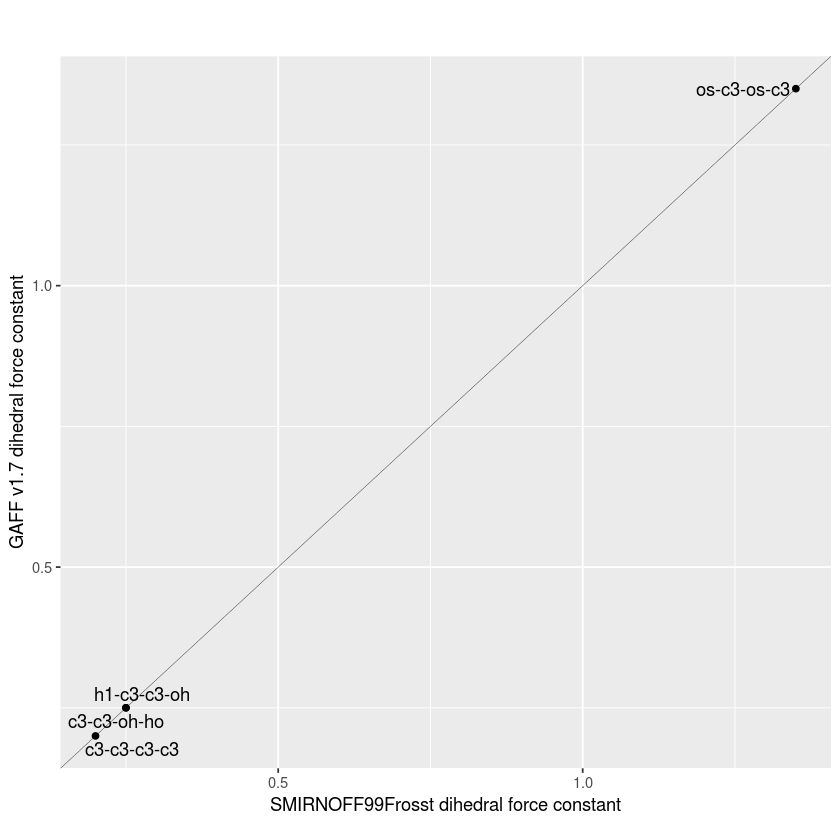

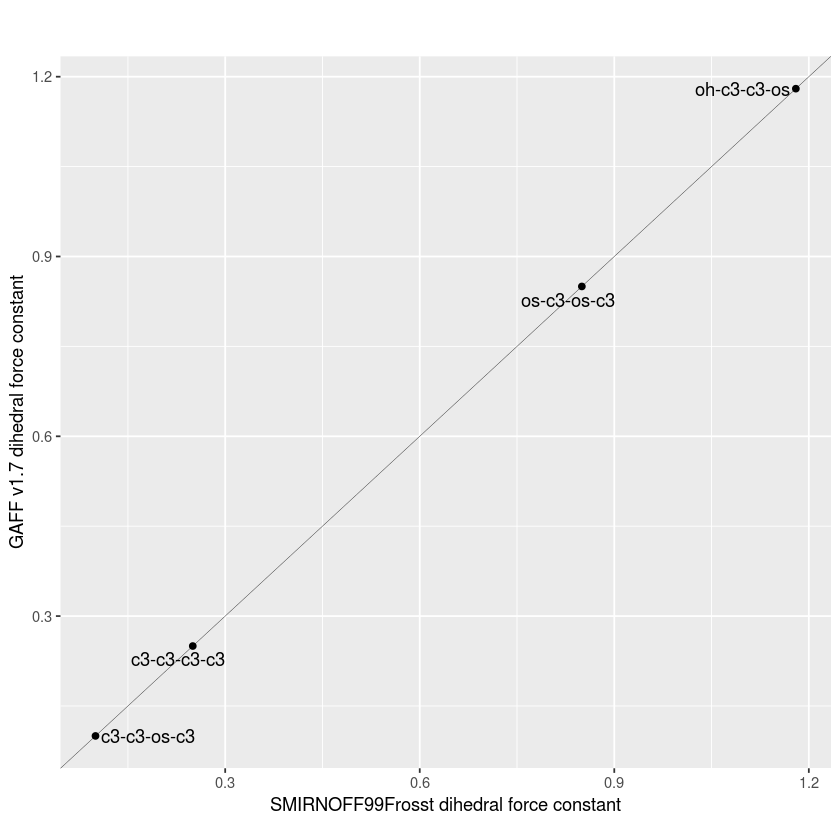

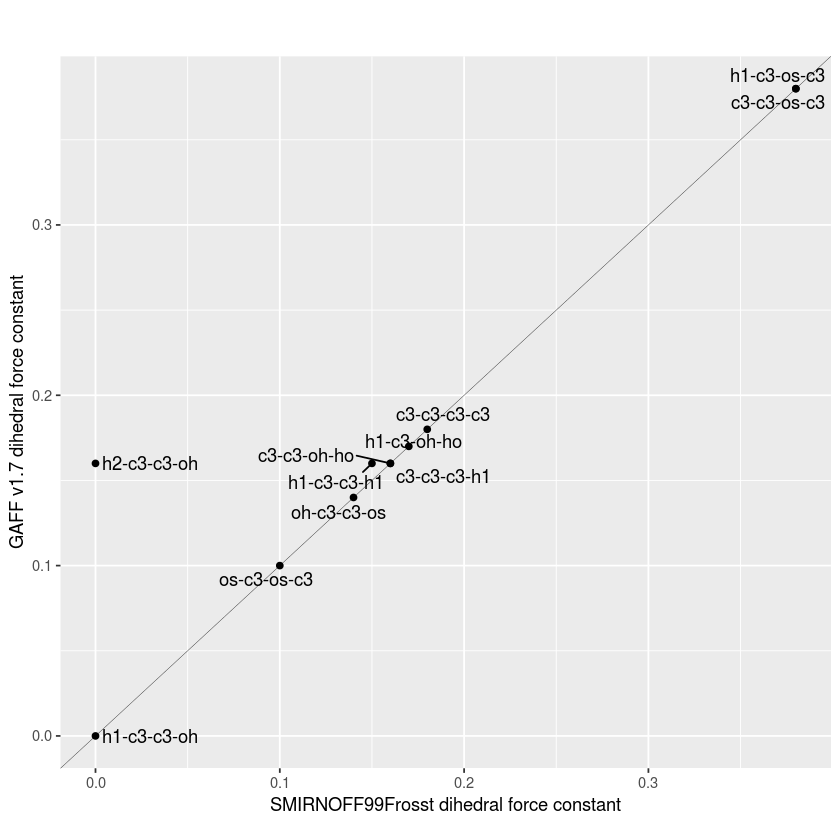

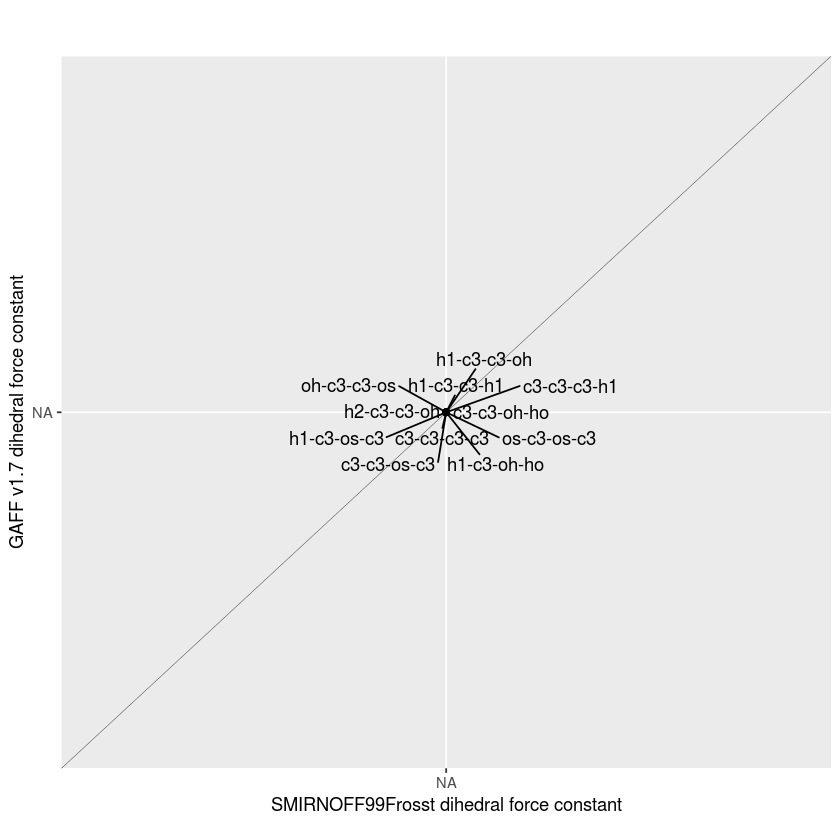

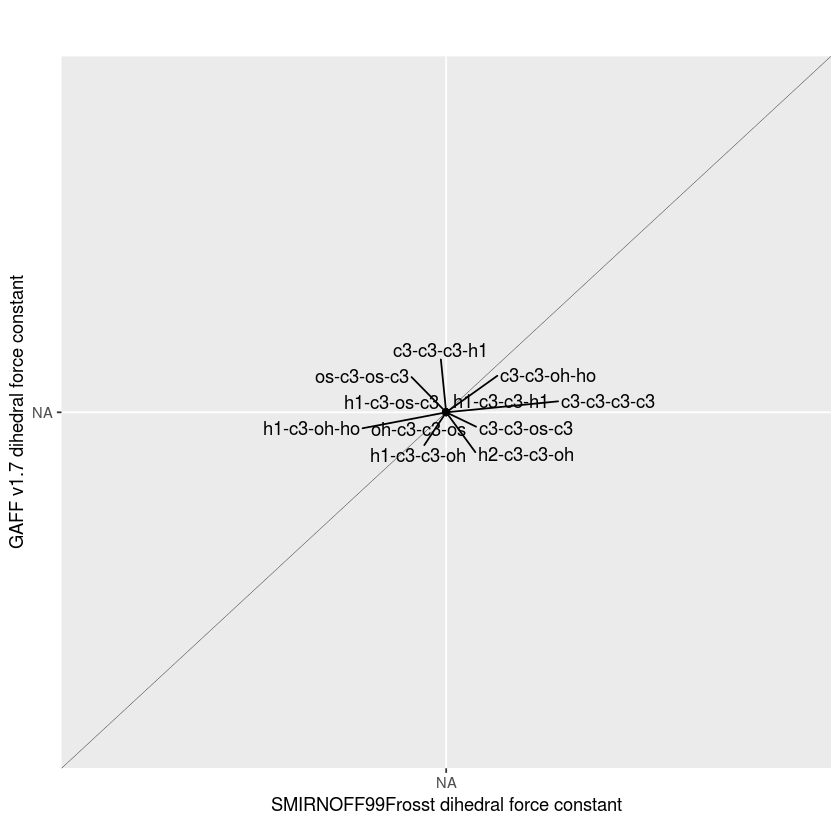

In [158]:
dihedrals %>%
  mutate_if(is.numeric, funs(round(., 2))) %>%
  distinct(phi_1_o, phase_1_o, phi_2_o, phase_2_o, phi_3_o, phase_3_o, phi_4_o, phase_4_o, phi_5_o, phase_5_o,
           phi_1_s, phase_1_s, phi_2_s, phase_2_s, phi_3_s, phase_3_s, phi_4_s, phase_4_s, phi_5_s, phase_5_s,
           .keep_all = TRUE) %>%
  ggplot(aes(x = phi_1_s, y = phi_1_o, label = paste0(atom1_type_o, "-", atom2_type_o, "-", atom3_type_o, "-", atom4_type_o))) +
  geom_point() + 
  geom_text_repel() +
  geom_abline(slope = 1, size = 0.1) +
  labs(subtitle="", 
       y="GAFF v1.7 dihedral force constant", 
       x="SMIRNOFF99Frosst dihedral force constant", 
       title="", 
       caption = "")
 
dihedrals %>%
  mutate_if(is.numeric, funs(round(., 2))) %>%
  distinct(phi_1_o, phase_1_o, phi_2_o, phase_2_o, phi_3_o, phase_3_o, phi_4_o, phase_4_o, phi_5_o, phase_5_o,
           phi_1_s, phase_1_s, phi_2_s, phase_2_s, phi_3_s, phase_3_s, phi_4_s, phase_4_s, phi_5_s, phase_5_s,
           .keep_all = TRUE) %>%
  ggplot(aes(x = phi_2_s, y = phi_2_o, label = paste0(atom1_type_o, "-", atom2_type_o, "-", atom3_type_o, "-", atom4_type_o))) +
  geom_point() + 
  geom_text_repel() +
  geom_abline(slope = 1, size = 0.1) +
  labs(subtitle="", 
       y="GAFF v1.7 dihedral force constant", 
       x="SMIRNOFF99Frosst dihedral force constant", 
       title="", 
       caption = "")

dihedrals %>%
  mutate_if(is.numeric, funs(round(., 2))) %>%
  distinct(phi_1_o, phase_1_o, phi_2_o, phase_2_o, phi_3_o, phase_3_o, phi_4_o, phase_4_o, phi_5_o, phase_5_o,
           phi_1_s, phase_1_s, phi_2_s, phase_2_s, phi_3_s, phase_3_s, phi_4_s, phase_4_s, phi_5_s, phase_5_s,
           .keep_all = TRUE) %>%
  ggplot(aes(x = phi_3_s, y = phi_3_o, label = paste0(atom1_type_o, "-", atom2_type_o, "-", atom3_type_o, "-", atom4_type_o))) +
  geom_point() + 
  geom_text_repel() +
  geom_abline(slope = 1, size = 0.1) +
  labs(subtitle="", 
       y="GAFF v1.7 dihedral force constant", 
       x="SMIRNOFF99Frosst dihedral force constant", 
       title="", 
       caption = "")

dihedrals %>%
  mutate_if(is.numeric, funs(round(., 2))) %>%
  distinct(phi_1_o, phase_1_o, phi_2_o, phase_2_o, phi_3_o, phase_3_o, phi_4_o, phase_4_o, phi_5_o, phase_5_o,
           phi_1_s, phase_1_s, phi_2_s, phase_2_s, phi_3_s, phase_3_s, phi_4_s, phase_4_s, phi_5_s, phase_5_s,
           .keep_all = TRUE) %>%
  ggplot(aes(x = phi_4_s, y = phi_4_o, label = paste0(atom1_type_o, "-", atom2_type_o, "-", atom3_type_o, "-", atom4_type_o))) +
  geom_point() + 
  geom_text_repel() +
  geom_abline(slope = 1, size = 0.1) +
  labs(subtitle="", 
       y="GAFF v1.7 dihedral force constant", 
       x="SMIRNOFF99Frosst dihedral force constant", 
       title="", 
       caption = "")

dihedrals %>%
  mutate_if(is.numeric, funs(round(., 2))) %>%
  distinct(phi_1_o, phase_1_o, phi_2_o, phase_2_o, phi_3_o, phase_3_o, phi_4_o, phase_4_o, phi_5_o, phase_5_o,
           phi_1_s, phase_1_s, phi_2_s, phase_2_s, phi_3_s, phase_3_s, phi_4_s, phase_4_s, phi_5_s, phase_5_s,
           .keep_all = TRUE) %>%
  ggplot(aes(x = phi_5_s, y = phi_5_o, label = paste0(atom1_type_o, "-", atom2_type_o, "-", atom3_type_o, "-", atom4_type_o))) +
  geom_point() + 
  geom_text_repel() +
  geom_abline(slope = 1, size = 0.1) +
  labs(subtitle="", 
       y="GAFF v1.7 dihedral force constant", 
       x="SMIRNOFF99Frosst dihedral force constant", 
       title="", 
       caption = "")

Warning message:
“Removed 7 rows containing missing values (geom_point).”Warning message:
“Removed 7 rows containing missing values (geom_text_repel).”Warning message:
“Removed 7 rows containing missing values (geom_point).”Warning message:
“Removed 7 rows containing missing values (geom_text_repel).”

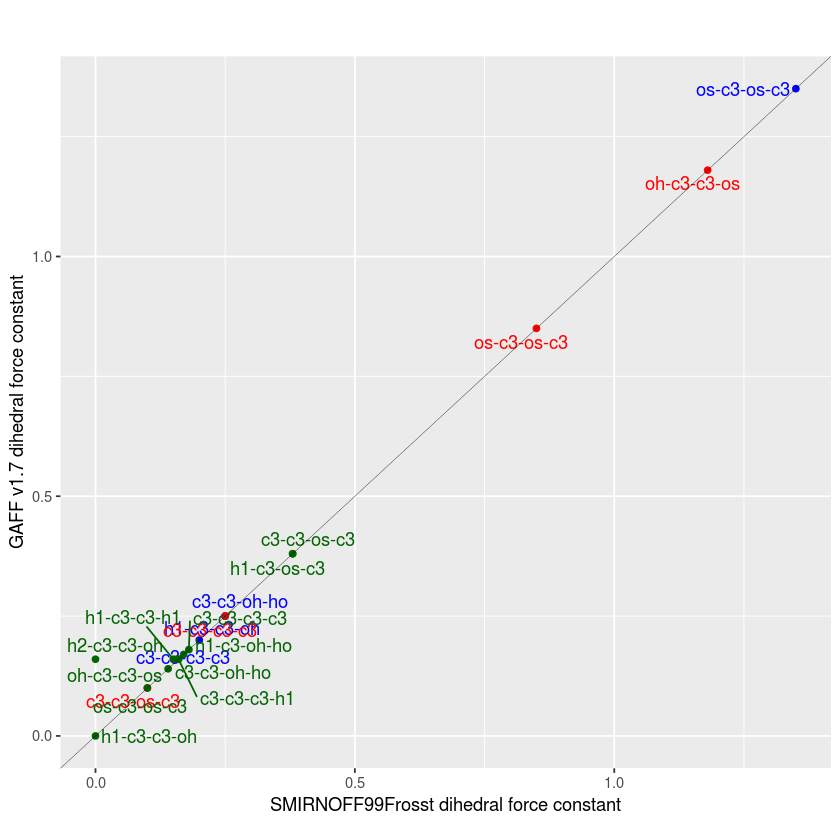

In [183]:
dihedrals %>%
  mutate_if(is.numeric, funs(round(., 2))) %>%
  distinct(phi_1_o, phase_1_o, phi_2_o, phase_2_o, phi_3_o, phase_3_o, phi_4_o, phase_4_o, phi_5_o, phase_5_o,
           phi_1_s, phase_1_s, phi_2_s, phase_2_s, phi_3_s, phase_3_s, phi_4_s, phase_4_s, phi_5_s, phase_5_s,
           .keep_all = TRUE) %>%
  ggplot() +
  geom_point(aes(x = phi_1_s, y = phi_1_o), color="blue") + 
  geom_text_repel(aes(x = phi_1_s, y = phi_1_o, label = paste0(atom1_type_o, "-", atom2_type_o, "-", atom3_type_o, "-", atom4_type_o)), color="blue") + 
  geom_point(aes(x = phi_2_s, y = phi_2_o), color="red") + 
  geom_text_repel(aes(x = phi_2_s, y = phi_2_o, label = paste0(atom1_type_o, "-", atom2_type_o, "-", atom3_type_o, "-", atom4_type_o)), color="red") +
  geom_point(aes(x = phi_3_s, y = phi_3_o), color="darkgreen") + 
  geom_text_repel(aes(x = phi_3_s, y = phi_3_o, label = paste0(atom1_type_o, "-", atom2_type_o, "-", atom3_type_o, "-", atom4_type_o)), color="darkgreen") + 


  geom_abline(slope = 1, size = 0.1) +
  labs(subtitle="", 
       y="GAFF v1.7 dihedral force constant", 
       x="SMIRNOFF99Frosst dihedral force constant", 
       title="", 
       caption = "")
 


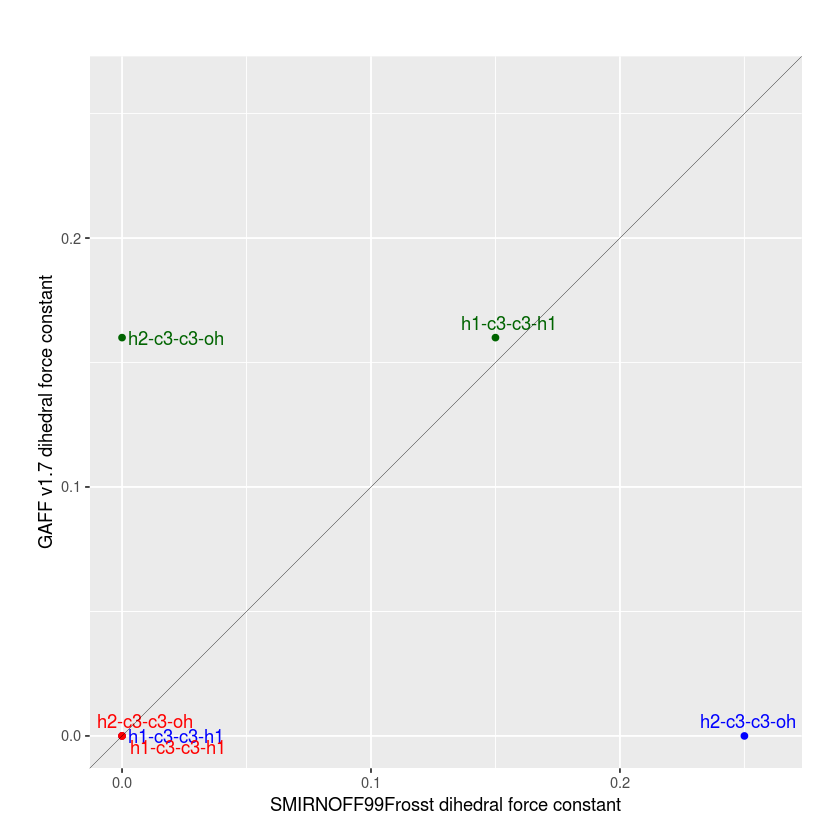

In [201]:
dihedrals %>%
  mutate_if(is.numeric, funs(round(., 2))) %>%
  distinct(phi_1_o, phase_1_o, phi_2_o, phase_2_o, phi_3_o, phase_3_o, phi_4_o, phase_4_o, phi_5_o, phase_5_o,
           phi_1_s, phase_1_s, phi_2_s, phase_2_s, phi_3_s, phase_3_s, phi_4_s, phase_4_s, phi_5_s, phase_5_s,
           .keep_all = TRUE) %>%
  mutate_each(funs(replace(., is.na(.), 0))) %>% 
  filter(abs(phi_1_o - phi_1_s) > 0.001 | 
         abs(phi_2_o - phi_2_s) > 0.001 |
         abs(phi_3_o - phi_3_s) > 0.001
         ) %>%
  ggplot() +
  geom_point(aes(x = phi_1_s, y = phi_1_o), color="blue") + 
  geom_text_repel(aes(x = phi_1_s, y = phi_1_o, label = paste0(atom1_type_o, "-", atom2_type_o, "-", atom3_type_o, "-", atom4_type_o)), color="blue") + 
  geom_point(aes(x = phi_2_s, y = phi_2_o), color="red") + 
  geom_text_repel(aes(x = phi_2_s, y = phi_2_o, label = paste0(atom1_type_o, "-", atom2_type_o, "-", atom3_type_o, "-", atom4_type_o)), color="red") +
  geom_point(aes(x = phi_3_s, y = phi_3_o), color="darkgreen") + 
  geom_text_repel(aes(x = phi_3_s, y = phi_3_o, label = paste0(atom1_type_o, "-", atom2_type_o, "-", atom3_type_o, "-", atom4_type_o)), color="darkgreen") + 
  coord_equal() + 
  xlim(0, 0.26) +
  ylim(0, 0.26) +
  geom_abline(slope = 1, size = 0.1) +
  labs(subtitle="", 
       y="GAFF v1.7 dihedral force constant", 
       x="SMIRNOFF99Frosst dihedral force constant", 
       title="", 
       caption = "")

In [202]:
dihedrals %>%
  mutate_if(is.numeric, funs(round(., 2))) %>%
  distinct(phi_1_o, phase_1_o, phi_2_o, phase_2_o, phi_3_o, phase_3_o, phi_4_o, phase_4_o, phi_5_o, phase_5_o,
           phi_1_s, phase_1_s, phi_2_s, phase_2_s, phi_3_s, phase_3_s, phi_4_s, phase_4_s, phi_5_s, phase_5_s,
           .keep_all = TRUE) %>%
  mutate_each(funs(replace(., is.na(.), 0))) %>% 
  filter(abs(phi_1_o - phi_1_s) > 0.001 | 
         abs(phi_2_o - phi_2_s) > 0.001 |
         abs(phi_3_o - phi_3_s) > 0.001
         )



X1,atom1,atom2,atom3,atom4,atom1_type_o,atom2_type_o,atom3_type_o,atom4_type_o,phi_1_o,⋯,phi_1_s,phase_1_s,phi_2_s,phase_2_s,phi_3_s,phase_3_s,phi_4_s,phase_4_s,phi_5_s,phase_5_s
19,H5,C5,C6,H61,h1,c3,c3,h1,0,⋯,0.00,0,0,0,0.15,0,0,0,0,0
54,H1,C1,C2,O2,h2,c3,c3,oh,0,⋯,0.25,0,0,0,0.00,0,0,0,0,0


In [198]:
dihedrals %>%
  mutate_if(is.numeric, funs(round(., 2))) %>%
  distinct(phi_1_o, phase_1_o, phi_2_o, phase_2_o, phi_3_o, phase_3_o, phi_4_o, phase_4_o, phi_5_o, phase_5_o,
           phi_1_s, phase_1_s, phi_2_s, phase_2_s, phi_3_s, phase_3_s, phi_4_s, phase_4_s, phi_5_s, phase_5_s,
           .keep_all = TRUE) %>%
  mutate_each(funs(replace(., is.na(.), 0))) %>% 
  filter(abs(phi_1_o - phi_1_s) > 0.001 | 
         abs(phi_2_o - phi_2_s) > 0.001 |
         abs(phi_3_o - phi_3_s) > 0.001
         )

X1,atom1,atom2,atom3,atom4,atom1_type_o,atom2_type_o,atom3_type_o,atom4_type_o,phi_1_o,⋯,phi_1_s,phase_1_s,phi_2_s,phase_2_s,phi_3_s,phase_3_s,phi_4_s,phase_4_s,phi_5_s,phase_5_s
19,H5,C5,C6,H61,h1,c3,c3,h1,0,⋯,0.00,0,0,0,0.15,0,0,0,0,0
54,H1,C1,C2,O2,h2,c3,c3,oh,0,⋯,0.25,0,0,0,0.00,0,0,0,0,0


In [150]:
dihedrals %>%
  mutate_if(is.numeric, funs(round(., 2))) %>%
  distinct(phi_1_o, phase_1_o, phi_2_o, phase_2_o, phi_3_o, phase_3_o, phi_4_o, phase_4_o, phi_5_o, phase_5_o,
           phi_1_s, phase_1_s, phi_2_s, phase_2_s, phi_3_s, phase_3_s, phi_4_s, phase_4_s, phi_5_s, phase_5_s,
           .keep_all = TRUE)


X1,atom1,atom2,atom3,atom4,phi_1_o,phase_1_o,phi_2_o,phase_2_o,phi_3_o,⋯,phi_1_s,phase_1_s,phi_2_s,phase_2_s,phi_3_s,phase_3_s,phi_4_s,phase_4_s,phi_5_s,phase_5_s
0,C1,C2,C3,C4,0.20,180,0.25,180,0.18,⋯,0.20,180,0.25,180,0.18,0,NA,NA,NA,NA
1,O3,C3,C4,O1,NA,NA,1.18,0,0.14,⋯,NA,NA,1.18,0,0.14,0,NA,NA,NA,NA
2,C3,C4,O1,C1,NA,NA,0.10,180,0.38,⋯,NA,NA,0.10,180,0.38,0,NA,NA,NA,NA
3,H2,C2,C3,O3,0.25,0,NA,NA,0.00,⋯,0.25,0,NA,NA,0.00,0,NA,NA,NA,NA
6,C4,C5,C6,H61,NA,NA,NA,NA,0.16,⋯,NA,NA,NA,NA,0.16,0,NA,NA,NA,NA
8,C2,C3,O3,HO3,0.25,0,NA,NA,0.16,⋯,0.25,0,NA,NA,0.16,0,NA,NA,NA,NA
13,H4,C4,O1,C1,NA,NA,NA,NA,0.38,⋯,NA,NA,NA,NA,0.38,0,NA,NA,NA,NA
17,O5,C1,O1,C4,1.35,180,0.85,180,0.10,⋯,1.35,180,0.85,180,0.10,0,NA,NA,NA,NA
19,H5,C5,C6,H61,NA,NA,NA,NA,0.16,⋯,NA,NA,NA,NA,0.15,0,NA,NA,NA,NA
38,H2,C2,O2,HO2,NA,NA,NA,NA,0.17,⋯,NA,NA,NA,NA,0.17,0,NA,NA,NA,NA


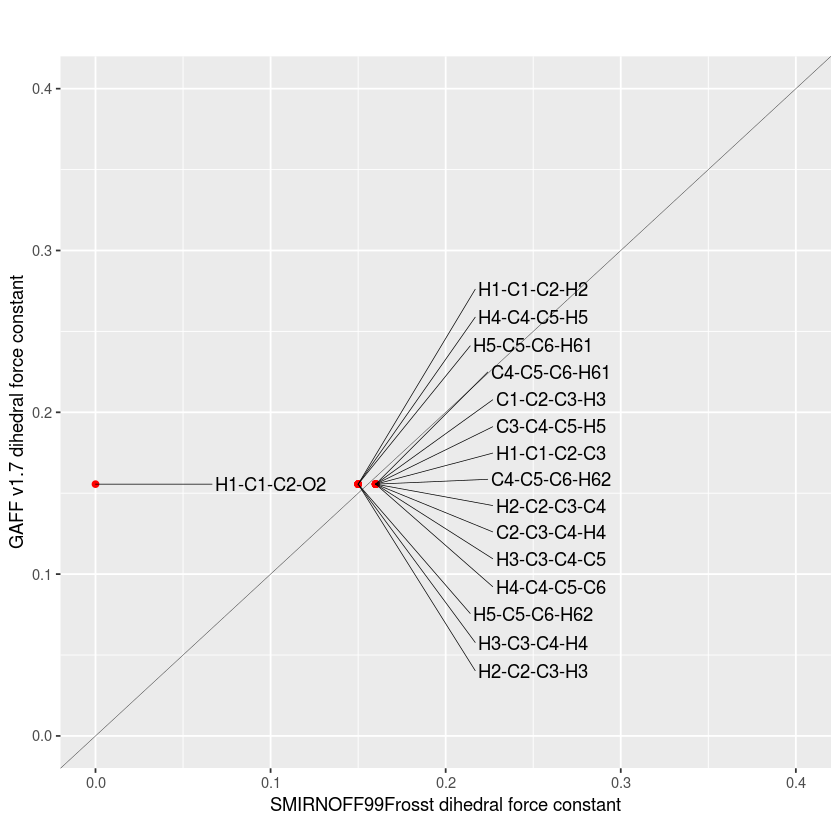

In [92]:
dihedrals %>%
  mutate_if(is.numeric, funs(round(., 4))) %>%
  distinct(atom1, atom2, atom3, atom4, per, .keep_all = TRUE) %>%
  filter(abs(phi_k_o - phi_k_s) > 0.001) %>%
  ggplot(aes(x = phi_k_s, y = phi_k_o, label = paste0(atom1, "-", atom2, "-", atom3, "-", atom4))) + 
  geom_point(colour = "red") +
  geom_abline(slope = 1, size = 0.1) +
  xlim(0, 0.4) +
  ylim(0, 0.4) +
  geom_text_repel(nudge_x = 0.1, direction = "y", segment.size = 0.2) + 
  labs(subtitle="", 
       y="GAFF v1.7 dihedral force constant", 
       x="SMIRNOFF99Frosst dihedral force constant", 
       title="", 
       caption = "")




In [99]:
dihedrals %>%
    filter(atom1 == "H1") %>%
    filter(atom2 == "C1")

X1,atom1,atom2,atom3,atom4,phi_k_o,per,phase_o,phi_k_s,phase_s
14048,H1,C1,O1,C4,0.3833333,3,0,0.3833333,0
14448,H1,C1,C2,H2,0.1555556,3,0,0.1500000,0
15024,H1,C1,C2,O2,0.1555556,3,0,0.0000000,0
15600,H1,C1,C2,C3,0.1555556,3,0,0.1600000,0
16176,H1,C1,O5,C5,0.3833333,3,0,0.3833333,0


Warning message:
“Removed 15 rows containing missing values (geom_point).”

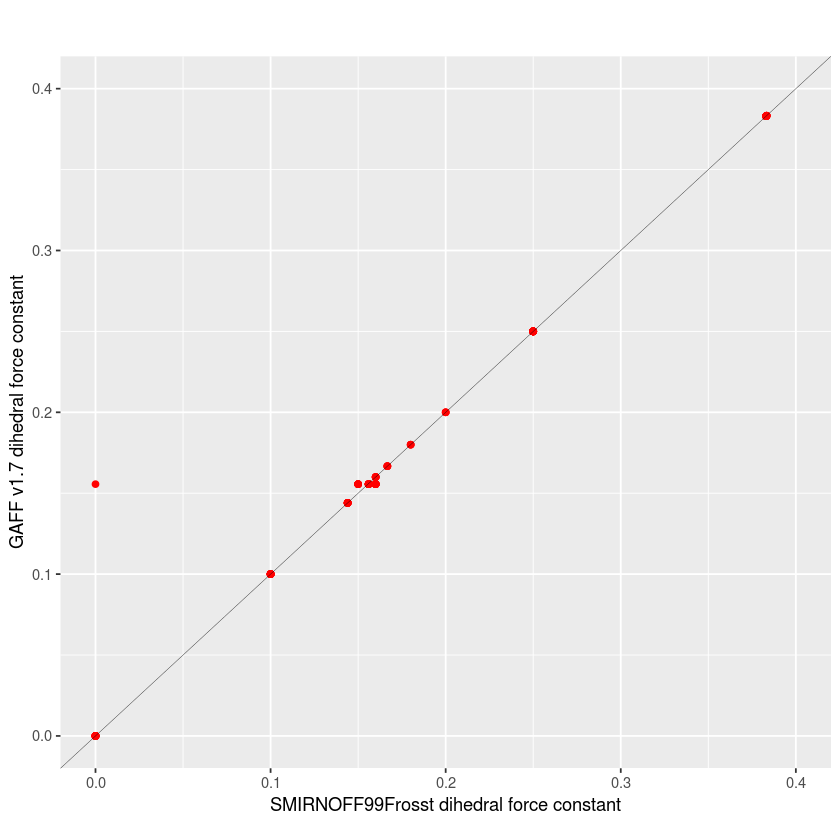

In [109]:
dihedrals %>%
  mutate_if(is.numeric, funs(round(., 4))) %>%
  group_by(per) %>%
  ggplot(aes(x = phi_k_s, y = phi_k_o)) + 
  geom_point(colour = "red") +
  geom_abline(slope = 1, size = 0.1) +
  xlim(0, 0.4) +
  ylim(0, 0.4) +
  labs(subtitle="", 
       y="GAFF v1.7 dihedral force constant", 
       x="SMIRNOFF99Frosst dihedral force constant", 
       title="", 
       caption = "")

In [110]:
dihedrals %>%
  mutate_if(is.numeric, funs(round(., 4))) %>%
  group_by(per)


X1,atom1,atom2,atom3,atom4,phi_k_o,per,phase_o,phi_k_s,phase_s
0,O5,C1,O1,C4,1.3500,1,180.0001,1.350,180
400,O5,C1,O1,C4,0.8500,2,180.0001,0.850,180
800,O5,C1,O1,C4,0.1000,3,0.0000,0.100,0
1200,O5,C1,C2,C3,0.1556,3,0.0000,0.156,0
1216,O5,C1,C2,O2,1.1750,2,0.0000,1.175,0
1232,O5,C1,C2,O2,0.1440,3,0.0000,0.144,0
1248,C2,C1,O1,C4,0.1000,2,180.0001,0.100,180
1648,C2,C1,O1,C4,0.3830,3,0.0000,0.383,0
2048,C2,C1,O5,C5,0.1000,2,180.0001,0.100,180
2624,C2,C1,O5,C5,0.3830,3,0.0000,0.383,0
